In [170]:
%matplotlib inline

import matplotlib as mpl
mpl.use('Agg')
from matplotlib.pyplot import imshow

In [185]:
import model
from model.captcha_cracker import CaptchaCracker


msoftmax_model_params_prefix = '/home/geetika/captcha/dataset_ssd_1T/simpledataset_nvocab/msoftmax'
lstm_model_params_prefix = '/home/geetika/captcha/dataset_ssd_1T/simpledataset_nvocab/lstm'
cracker = model.captcha_cracker.CaptchaCracker(lstm_model_params_prefix, multi_chars=True, num_softmaxes=None)

import os
from PIL import Image
import numpy
import random

#image_dir = '/home/geetika/captcha/dataset_ssd/simpledataset'
image_dir = '/home/geetika/captcha/dataset/mix_training_data/dataset'
import model
files = os.listdir(image_dir)

/home/geetika/captcha/dataset/mix_training_data/dataset/1_ar3pp.jpg
w73yf
predicted_char= w
[('w', 0.11441107), ('x', 0.095298633), ('m', 0.087127946), ('p', 0.075727746), ('b', 0.073529892), ('k', 0.070328794), ('3', 0.057235457), ('y', 0.056838036), ('e', 0.041687377), ('5', 0.035617422)]
predicted_char= 7
[('7', 0.38428289), ('y', 0.23048697), ('x', 0.11612348), ('r', 0.10264322), ('f', 0.062460925), ('k', 0.033544395), ('c', 0.015325123), ('w', 0.014082345), ('5', 0.010920974), ('4', 0.010129959)]
predicted_char= 3
[('3', 0.76424372), ('5', 0.1046358), ('g', 0.038381539), ('e', 0.016549321), ('6', 0.014224753), ('y', 0.014008375), ('c', 0.0075067324), ('8', 0.0071195951), ('b', 0.0067127016), ('7', 0.0056611747)]
predicted_char= y
[('y', 0.87523907), ('g', 0.061658297), ('p', 0.02062094), ('x', 0.01628571), ('w', 0.015786044), ('4', 0.0024964919), ('7', 0.0013002581), ('3', 0.0012922857), ('c', 0.0011564355), ('e', 0.00080570567)]
predicted_char= f
[('f', 0.9442569), ('7', 0.023878

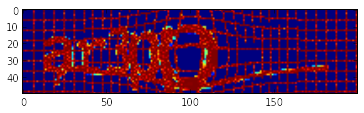

In [200]:
file_path = os.path.join(image_dir, random.choice(files))
print file_path

# Converted image.
imshow(numpy.asarray(Image.open(file_path).convert('L')))


predicted_chars, char_probabilities = cracker.InferFromImagePath(file_path)

print "".join(x for x in predicted_chars)

for i in range(len(predicted_chars)):
    print 'predicted_char= {0}'.format(predicted_chars[i])
    print sorted([(char, prob) for char, prob in char_probabilities[i].iteritems()], key=lambda x: x[1], reverse=True)[:10]